### HOG(Step.1) 勾配強度・勾配角度

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# get HOG step1
def HOG_step1(img):
    # gray scale
    def BGR2GRAY(img):
        gray =  0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
        return gray
    
    # gx, gy
    def get_gradXY(gray):
        H,W = gray.shape
        

        gray = np.pad(gray, (1,1), 'edge')

        gx = gray[1:1+H, 2:] - gray[1:1+H, :W]
        gy = gray[2:, 1:1+W] - gray[:H, 1:1+W]
        gx[gx==0] = 1e-6
        
        return gx, gy
    
    
    
    
    # magunitude and angle
    def get_MagGrad(gx, gy):
        magunitude = np.sqrt(gx**2+gy**2)
        gradient = np.arctan(gy/gx)
        
        #gradient[gradient < 0] = np.pi/2 + gradient[gradient<0] +np.pi/2
        gradient[gradient < 0] = np.pi + gradient[gradient<0]
        
        return magunitude, gradient
    
    # quantization
    def quantization(gradient):
        # prepare quantization table
        gradient_quantized = np.zeros_like(gradient, dtype=np.int)
        
        # quantization base
        d = np.pi/9
        
        # quantization
        for i in range(9):
            gradient_quantized[np.where((gradient>=d*i)&(gradient<=d*(i+1)))] = i
            # これは両端気にしなくていいのか？
            
        return gradient_quantized
    
    gray = BGR2GRAY(img)
    gx, gy = get_gradXY(gray)
    magunitude, gradient = get_MagGrad(gx, gy)
    gradient_quantized = quantization(gradient)
    
    return magunitude, gradient_quantized


True

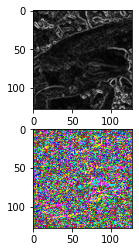

In [18]:
img = cv2.imread('../imori.jpg').astype(np.float32)
magunitude, gradient_quantized = HOG_step1(img)

# write gradient magunitude to file
_magunitude = (magunitude/magunitude.max() * 255).astype(np.uint8)

# clip ?  OK
_magunitude = np.clip(magunitude,0, 255).astype(np.uint8)
plt.subplot(2, 1,1)
plt.imshow(_magunitude, cmap='gray')
cv2.imwrite('out_mag.jpg', _magunitude)

# write gradient angle to file
H,W,C = img.shape
out = np.zeros((H,W,C), dtype=np.uint8)

# define color
colors = [[255,0,0],[0,255,0],[0,0,255],[255,255,0],[255,0,255],[0,255,255],[127,127,0],[127,0,127],[0,127,127]]

# draw color
for i in range(9):
    out[gradient_quantized==i] = colors[i]

plt.subplot(2, 1,2)
plt.imshow(out)
cv2.imwrite('out_grad.jpg', out)
